In [1]:
import csv
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
data2015 = pd.read_csv('marathon_results_2015.csv')
data2016 = pd.read_csv('marathon_results_2016.csv')
data2017= pd.read_csv("marathon_results_2017.csv")

In [3]:
len(data2015),len(data2016),len(data2017)

(26598, 26630, 26410)

In [4]:
data2015.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [5]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 25 columns):
Unnamed: 0       26598 non-null int64
Bib              26598 non-null object
Name             26598 non-null object
Age              26598 non-null int64
M/F              26598 non-null object
City             26598 non-null object
State            24047 non-null object
Country          26598 non-null object
Citizen          1064 non-null object
Unnamed: 9       67 non-null object
5K               26598 non-null object
10K              26598 non-null object
15K              26598 non-null object
20K              26598 non-null object
Half             26598 non-null object
25K              26598 non-null object
30K              26598 non-null object
35K              26598 non-null object
40K              26598 non-null object
Pace             26598 non-null object
Proj Time        26598 non-null object
Official Time    26598 non-null object
Overall          26598 non-null int64
G

In [6]:
timeData2015 = data2015[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]
timeData2016 = data2016[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]
timeData2017 = data2017[['Bib','Age','M/F','Half', 'Official Time', 'Overall']]

In [7]:
timeData2015 = timeData2015[ ~ timeData2015['Half'].str.contains('-')]
timeData2016 = timeData2016[ ~ timeData2016['Half'].str.contains('-')]
timeData2017 = timeData2017[ ~ timeData2017['Half'].str.contains('-')]

In [8]:
timeData2015 = timeData2015[ ~ timeData2015['Official Time'].str.contains('-')]
timeData2016 = timeData2016[ ~ timeData2016['Official Time'].str.contains('-')]
timeData2017 = timeData2017[ ~ timeData2017['Official Time'].str.contains('-')]

In [9]:
timeData2015['Official Time']= pd.to_timedelta(timeData2015['Official Time'])
timeData2015['Half']= pd.to_timedelta(timeData2015['Half'])
timeData2016['Official Time']= pd.to_timedelta(timeData2016['Official Time'])
timeData2016['Half']= pd.to_timedelta(timeData2016['Half'])
timeData2017['Official Time']= pd.to_timedelta(timeData2017['Official Time'])
timeData2017['Half']= pd.to_timedelta(timeData2017['Half'])

In [10]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall
6859,8949,55,M,01:38:55,03:19:26,6860
15738,17363,47,F,01:46:21,03:47:55,15739
12655,11027,46,M,01:43:07,03:37:43,12656
1970,4690,41,M,01:28:29,02:57:24,1971
20975,27397,24,M,02:05:40,04:13:06,20976


In [11]:
timeData2015['Second Half']=timeData2015['Official Time']-timeData2015['Half']
timeData2016['Second Half']=timeData2016['Official Time']-timeData2016['Half']
timeData2017['Second Half']=timeData2017['Official Time']-timeData2017['Half']

In [12]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall,Second Half
15228,17167,28,F,01:47:20,03:46:03,15229,01:58:43
16006,29692,53,M,01:54:02,03:48:49,16007,01:54:47
22674,18495,49,F,02:07:24,04:27:09,22675,02:19:45
10300,13560,46,F,01:42:22,03:30:28,10301,01:48:06
21246,24694,57,F,01:55:13,04:15:08,21247,02:19:55


In [13]:
timeData2015['Split Diff']=timeData2015['Second Half'].dt.total_seconds()-timeData2015['Half'].dt.total_seconds()
timeData2016['Split Diff']=timeData2016['Second Half'].dt.total_seconds()-timeData2016['Half'].dt.total_seconds()
timeData2017['Split Diff']=timeData2017['Second Half'].dt.total_seconds()-timeData2017['Half'].dt.total_seconds()

In [14]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall,Second Half,Split Diff
18285,21619,60,M,01:54:07,03:57:21,18286,02:03:14,547.0
19754,31595,60,M,01:58:17,04:05:11,19755,02:06:54,517.0
10415,9983,52,M,01:38:21,03:30:49,10416,01:52:28,847.0
15436,19734,62,M,01:47:21,03:46:46,15437,01:59:25,724.0
23062,28884,49,M,02:13:19,04:31:27,23063,02:18:08,289.0


In [15]:
timeData2015['negative']=timeData2015['Split Diff']<0
timeData2016['negative']=timeData2016['Split Diff']<0
timeData2017['negative']=timeData2017['Split Diff']<0

In [16]:
timeData2015.sample(5)

,Bib,Age,M/F,Half,Official Time,Overall,Second Half,Split Diff,negative
8507,18334,40,M,01:43:00,03:25:09,8508,01:42:09,-51.0,True
12589,16791,38,F,01:45:33,03:37:29,12590,01:51:56,383.0,False
14667,20801,45,F,01:48:41,03:44:04,14668,01:55:23,402.0,False
22217,26540,26,F,02:09:41,04:22:51,22218,02:13:10,209.0,False
18237,11921,47,M,01:54:26,03:57:04,18238,02:02:38,492.0,False


In [17]:
N=timeData2015['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2015['binned'] = pd.cut(timeData2015['Overall'], bins=bins, labels=labels)
N=timeData2016['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2016['binned'] = pd.cut(timeData2016['Overall'], bins=bins, labels=labels)
N=timeData2017['Overall'].max()
bins=(range(0,110,10)*N)/100
labels=range(10,110,10)
timeData2017['binned'] = pd.cut(timeData2017['Overall'], bins=bins, labels=labels)

In [18]:
timeData2015['Overall'].max(), len(timeData2015)

(26598, 26570)

In [19]:
df2015=timeData2015.groupby(['binned'])['negative'].value_counts()
df2016=timeData2016.groupby(['binned'])['negative'].value_counts()
df2017=timeData2017.groupby(['binned'])['negative'].value_counts()

In [20]:
x2015=[]
y2015=[]
for key,value in df2015.items():
    b, t = key
    if t == True:
        x2015.append(b)
        y2015.append(value)
x2016=[]
y2016=[]
for key,value in df2016.items():
    b, t = key
    if t == True:
        x2016.append(b)
        y2016.append(value)
x2017=[]
y2017=[]
for key,value in df2017.items():
    b, t = key
    if t == True:
        x2017.append(b)
        y2017.append(value)

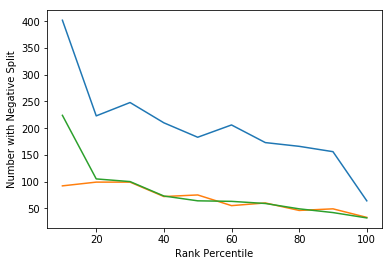

In [22]:
%matplotlib inline
from matplotlib.pyplot import subplots
fig, ax = subplots()
#fig.set_size_inches(18,4)
ax.plot(x2015, y2015, x2016, y2016, x2017, y2017)
ax.set_xlabel("Rank Percentile")
ax.set_ylabel("Number with Negative Split")
fig.savefig("split-rank.png",dpi=500)

In [106]:
timeData2015['percent'] = (timeData2015['Split Diff']*100)/timeData2015['Half'].dt.total_seconds()

In [110]:
timeData2015['percentInt']=np.rint(timeData2015['percent'])

In [111]:
splitChart = timeData2015['percentInt'].value_counts().rename_axis('split percent').reset_index(name='counts')

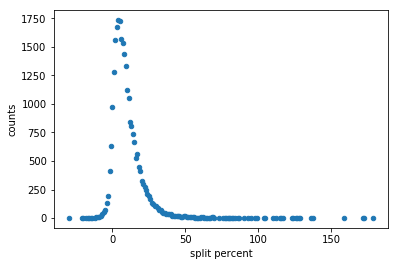

In [162]:
import matplotlib.pyplot as plt
splitChart.plot.scatter(x='split percent',y='counts')
plt.savefig("percent-split.png",dpi=500)